In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style('white')
df = pd.read_csv('hfi_cc_2018.csv')

#outcome variable is hf_score column --> final human freedom score for the specified country for a given year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


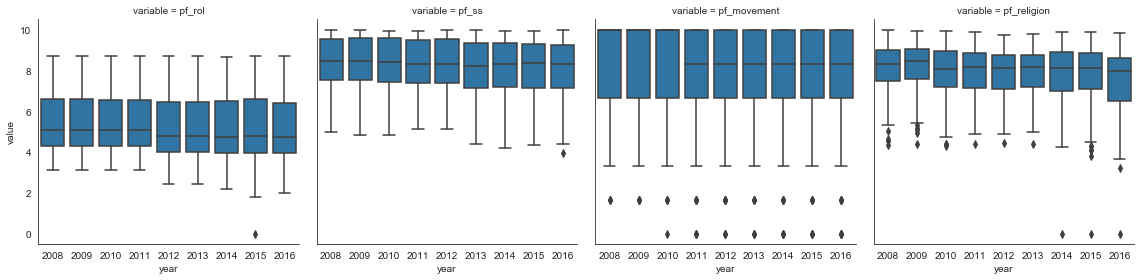

In [3]:
df_years = df[['year','pf_rol','pf_ss','pf_movement','pf_religion']].dropna()
df_years = pd.melt(df_years, id_vars=['year'])

g = sns.FacetGrid(df_years, col="variable", height=4, aspect=1)
g = g.map(sns.boxplot, "year", "value")
plt.show()

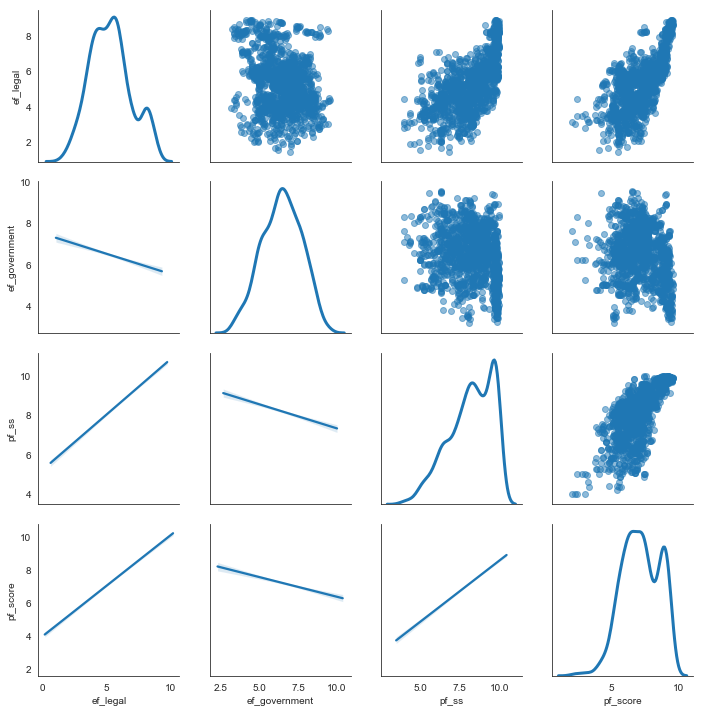

In [14]:
#'ef_legal', 'pf_rol', 'pf_ss', 'pf_score'
df_continuous = df[['ef_legal', 'ef_government', 'pf_ss', 'pf_score']].dropna()
#print(df_continuous.shape)
#jitter = pd.DataFrame(
#    np.random.uniform(-.3, .3, size=(df_continuous.shape)),
#    columns=df_continuous.columns
#)
#print(jitter.shape)
##df_continuous = df_continuous.add(jitter)

#for row_index in range(df_continuous.shape[0]):
#    for column_index in range(df_continuous.shape[1]):
#        old_value = df_continuous.iloc[row_index, column_index]
#        df_continuous.iloc[row_index, column_index] = df_continuous.iloc[row_index, column_index] + jitter.iloc[row_index, column_index]

#print(df_continuous.shape)

g = sns.PairGrid(df_continuous, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [15]:
dfy = df.loc[df['year']==2016]
print(dfy['region'].unique())

regions = dfy.groupby('region').count()['ISO_code']
print(regions)

cross = pd.crosstab(dfy['region'],dfy['ISO_code'], margins=True)
print(cross['All'])

['Eastern Europe' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'Latin America & the Caribbean' 'Caucasus & Central Asia' 'Oceania'
 'Western Europe' 'South Asia' 'North America' 'East Asia']
region
Caucasus & Central Asia           6
East Asia                         6
Eastern Europe                   22
Latin America & the Caribbean    26
Middle East & North Africa       19
North America                     2
Oceania                           4
South Asia                       17
Sub-Saharan Africa               42
Western Europe                   18
Name: ISO_code, dtype: int64
region
Caucasus & Central Asia            6
East Asia                          6
Eastern Europe                    22
Latin America & the Caribbean     26
Middle East & North Africa        19
North America                      2
Oceania                            4
South Asia                        17
Sub-Saharan Africa                42
Western Europe                    18
All                           

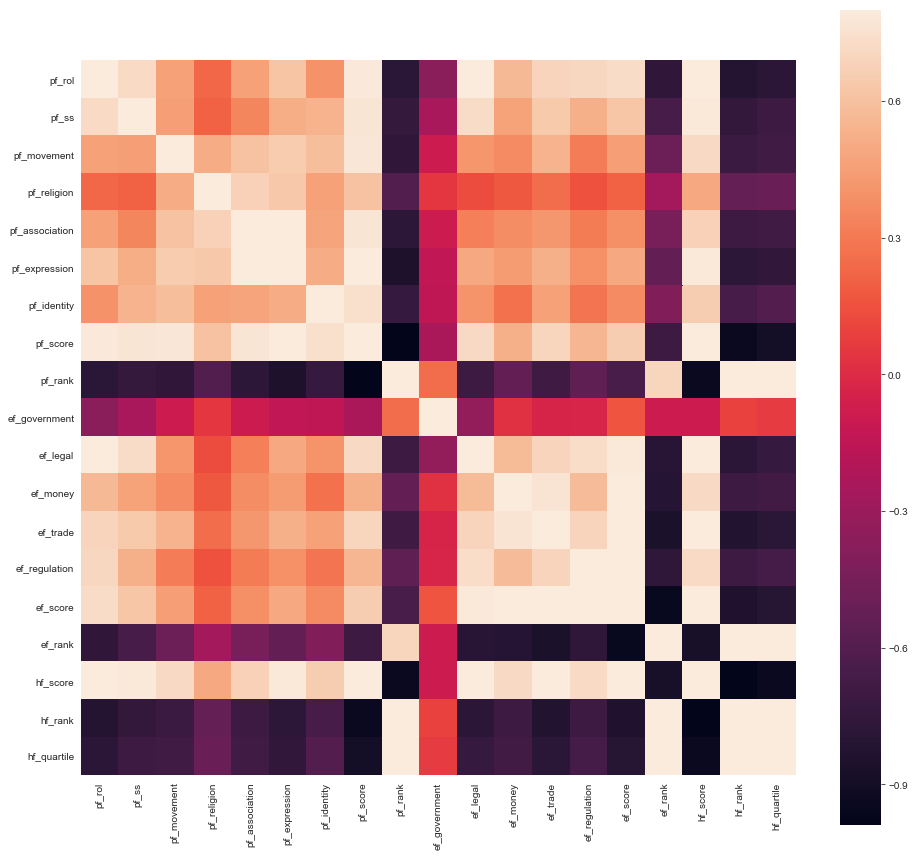

                  pf_rol     pf_ss  pf_movement  pf_religion  pf_association  \
pf_rol          1.000000  0.721087     0.458832     0.229283        0.463234   
pf_ss           0.721087  1.000000     0.446928     0.210658        0.346421   
pf_movement     0.458832  0.446928     1.000000     0.508953        0.605797   
pf_religion     0.229283  0.210658     0.508953     1.000000        0.677668   
pf_association  0.463234  0.346421     0.605797     0.677668        1.000000   
pf_expression   0.611516  0.519796     0.650651     0.636641        0.842292   
pf_identity     0.401309  0.534916     0.588896     0.458129        0.474267   
pf_score        0.792331  0.771162     0.775523     0.607074        0.770365   
pf_rank        -0.789784 -0.743795    -0.759984    -0.611862       -0.778561   
ef_government  -0.368984 -0.243411    -0.090341     0.049754       -0.088321   
ef_legal        0.908796  0.728342     0.414265     0.130761        0.319860   
ef_money        0.563378  0.471327     0

C:\Users\Po\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
newdf = dfy[['pf_rol','pf_ss','pf_movement','pf_religion',
    'pf_association','pf_expression','pf_identity',
    'pf_score','pf_rank','ef_government','ef_legal',
    'ef_money','ef_trade',
    'ef_regulation','ef_score','ef_rank','hf_score',
    'hf_rank','hf_quartile'
]]
newdf = newdf.dropna()
corrmat = newdf.corr()
f, ax = plt.subplots(figsize=(16, 15))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
print(corrmat)

features = pd.get_dummies(newdf['hf_rank'])

means = newdf[['pf_rol','ef_regulation']].mean(axis=0)
stds = newdf[['pf_rol','ef_regulation']].std(axis=0)
features['governance'] = ((newdf[['pf_rol','ef_regulation']] - means) / stds).mean(axis=1)

testdf = newdf[['pf_rol','ef_regulation']]
testdf['governance'] = features['governance'] 
corrmat2 = testdf.corr()
print(corrmat2)

In [39]:
#pf_ss - personal safety and security rating
#use this 1-10 scale rating to see if this is a good tourist destination
dfy['TouristDestination'] = np.where(dfy['pf_ss'] > 9, 1, 0)
dfy.loc[dfy['TouristDestination'] == 1, ['countries']]

C:\Users\Po\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,countries
3,Argentina
5,Australia
6,Austria
12,Belarus
13,Belgium
22,Bulgaria
25,Cambodia
27,Canada
38,Croatia
39,Cyprus


In [40]:
# 'ef_legal', 'pf_rol', 'pf_ss', 'pf_score'
features = newdf[['ef_legal', 'pf_rol', 'pf_ss', 'pf_score']]
#print(features)
X = StandardScaler().fit_transform(features)
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
# ef_legal can be used in place os all four features keeping 82.95% of all the variances

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.82952493 0.09158882 0.06023533 0.01865091]


In [41]:
features = newdf[['pf_movement', 'pf_expression', 'pf_identity', 'pf_score']]
#print(features)
X = StandardScaler().fit_transform(features)
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
# pf_movement can be used in place os all four features keeping 76.8% of all the variances

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.76857762 0.1248346  0.08661173 0.01997604]


In [ ]:

df = pd.read_csv('ESSdata_Thinkful.csv')
#print(df.cntry.unique())
#print(df.year.unique())
#X = StandardScaler().fit_transform(df)

#removed condition
#& (df['year'] == 6)

nwdf = df.loc[
    ((df['cntry'] == 'NO') | (df['cntry'] == 'ES')) , 
    ['tvtot','ppltrst','pplfair','pplhlp','happy','sclmeet','sclact','gndr','agea','partner']
].dropna()

nwdf = nwdf.loc[:, 'tvtot':'partner']

print(nwdf.shape)
print(nwdf.columns)
print(nwdf.index)
jitter = pd.DataFrame(
    np.random.uniform(-.3,.3, size=(nwdf.shape)),
    columns=nwdf.columns
)

print(jitter.shape)
print(jitter.columns)
print(jitter.index)

for row_index in range(nwdf.shape[0]):
    for column_index in range(nwdf.shape[1]):
        old_value = nwdf.iloc[row_index, column_index]
        nwdf.iloc[row_index, column_index] = nwdf.iloc[row_index, column_index] + jitter.iloc[row_index, column_index]
        #print(nwdf.iloc[row_index, column_index], jitter.iloc[row_index, column_index], old_value)


In [ ]:
g = sns.PairGrid(nwdf, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [ ]:
corrmat = nwdf.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()